# Adaboost

In [19]:
# importing required libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris, load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import xgboost

In [2]:
# loading the dataset and splitting into train and test
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3, random_state = 100)

In [3]:
# training the model
ada_clf = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.5, random_state = 100)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=200, random_state=100)

In [5]:
# predicting for the training set
y_train_pred = ada_clf.predict(X_train)

In [7]:
confusion_matrix(y_train, y_train_pred)

array([[34,  0,  0],
       [ 0, 39,  0],
       [ 0,  8, 24]])

In [9]:
# predicting for the testing set and evaluating
y_test_pred = ada_clf.predict(X_test)

In [10]:
confusion_matrix(y_test, y_test_pred)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  2, 16]])

# Gradient boosting

In [12]:
# Loading the dataset and splitting into train and test
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.3, random_state = 100)

In [13]:
# training the model
gbrt = GradientBoostingRegressor(max_depth = 3)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor()

In [14]:
# predicting for the training set and evaluating
y_train_pred = gbrt.predict(X_train)

Text(0, 0.5, 'y_pred')

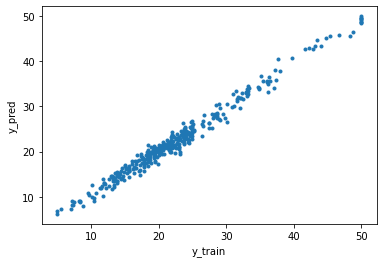

In [16]:
plt.plot(y_train, y_train_pred, '.')
plt.xlabel('y_train')
plt.ylabel('y_pred')

In [17]:
# predicting for the testing set and evaluating
y_test_pred = gbrt.predict(X_test)

Text(0, 0.5, 'y_pred')

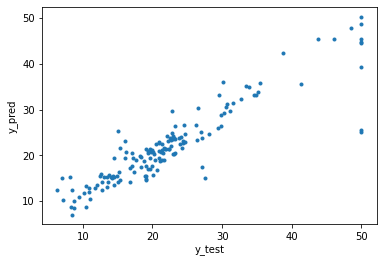

In [18]:
plt.plot(y_test, y_test_pred, '.')
plt.xlabel('y_test')
plt.ylabel('y_pred')

# XGBoost

In [20]:
# training the model
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
# predicting for the training set and evaluating
y_train_pred = xgb_reg.predict(X_train)

Text(0, 0.5, 'y_pred')

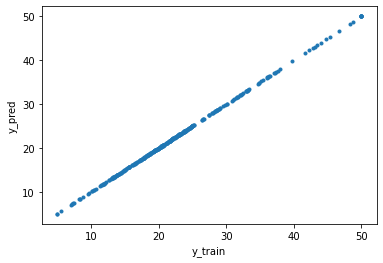

In [22]:
plt.plot(y_train, y_train_pred, '.')
plt.xlabel('y_train')
plt.ylabel('y_pred')

In [23]:
# predicting for the testing set and evaluating
y_test_pred = gbrt.predict(X_test)

Text(0, 0.5, 'y_pred')

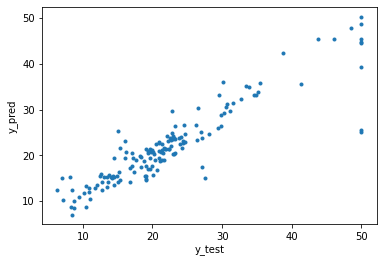

In [24]:
plt.plot(y_test, y_test_pred, '.')
plt.xlabel('y_test')
plt.ylabel('y_pred')

## Further reading for XGBoost

### https://github.com/dmlc/xgboost

### Parameters in XGBoost:

#### XGBoost has a lot more parameters than Random Forest and generally requires more tuning.

#### max_depth: Specifies the maximum depth of the tree. Setting a high value for max_depth may increase the likelihood of overfitting and make the model more complex.

#### n_estimators: Specifies the numbers of trees to fit. Generally speaking, the larger value, the better. Setting this parameter too high may affect training speed. Adding more trees beyond a certain point may not improve accuracy.

#### sub_sample: Specifies the fraction of data that will be selected for each tree. Setting this parameter can increase training speed and help prevent overfitting. Setting it too low may cause underfitting.

#### colsample_bytree: Specifies the fraction of columns that will be selected randomly for each tree. Setting this parameter can increase training speed and help prevent overfitting. Related parameters include colsample_bylevel and colsample_bynode.

#### objective: Specifies the learning task and learning objective. It is important to set the correct value for this parameter to avoid unpredictable results or poor accuracy. XGBClassifier defaults to binary:logistic for binary classification, while XGBRegressor defaults to reg:squarederror. Other values include multi:softmax and multi:softprob for multiclass classification; rank:pairwise, rank:ndcg, and rank:map for ranking; and survival:cox for survival regression using Cox proportional hazards model, to mention a few.

#### learning_rate (eta): learning_rate is used as a shrinkage factor to reduce the feature weights after each boosting step, with the goal of slowing down the learning rate. This parameter is used to control overfitting. Lower values require more trees.

#### n_jobs: Specifies the number of parallel threads used by XGBoost (if n_thread is deprecated, use this parameter instead).